<a href="https://colab.research.google.com/github/samgdotson/2019-dotson-winter/blob/master/typical_solarpower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here we will obtain a typical history set for the predicted power output from the solar irradiance model.

In [0]:
from google.colab import files
# uploaded = files.upload()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('solar_model_data.csv', usecols=['time','power_norm'])

In [0]:
df

,time,power_norm
0,2013-01-01 00:00:00,0.0
1,2013-01-01 01:00:00,0.0
2,2013-01-01 02:00:00,0.0
3,2013-01-01 03:00:00,0.0
4,2013-01-01 04:00:00,0.0
...,...,...
52579,2018-12-31 19:00:00,0.0
52580,2018-12-31 20:00:00,0.0
52581,2018-12-31 21:00:00,0.0
52582,2018-12-31 22:00:00,0.0


In [0]:
# group by years

df['time']=pd.to_datetime(df['time'])

grouped = df.groupby(df['time'].dt.year)

df13 = grouped.get_group(2013)
df14 = grouped.get_group(2014)
df15 = grouped.get_group(2015)
df16 = grouped.get_group(2016)
df17 = grouped.get_group(2017)
df18 = grouped.get_group(2018)

In [0]:
df13 = df13.reset_index(drop=True)

In [0]:
df14 = df14.reset_index(drop=True)

In [0]:
df15 = df15.reset_index(drop=True)

In [0]:
df17 = df17.reset_index(drop=True)

In [0]:
df18 = df18.reset_index(drop=True)

In [0]:
df13.time = df13.index
df14.time = df14.index
df15.time = df15.index
df17.time = df17.index
df18.time = df18.index

In [0]:
df13.to_csv('solar_model2013.csv')
df14.to_csv('solar_model2014.csv')
df15.to_csv('solar_model2015.csv')
df17.to_csv('solar_model2017.csv')
df18.to_csv('solar_model2018.csv')

In [32]:
upload2 = files.upload()

Saving printTypicalSolar_0.csv to printTypicalSolar_0 (1).csv


In [33]:
typical = pd.read_csv('printTypicalSolar_0.csv')
typical

,time,power_norm
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
8755,8755,0.0
8756,8756,0.0
8757,8757,0.0
8758,8758,0.0


In [43]:
total_out = typical['power_norm'].sum()
perfect = 4680000*8760
total_out/perfect

0.20553453455895032

Text(0.5, 0.05, '*The model used to construct this dataset overpredicts the power output from the solar farm.')

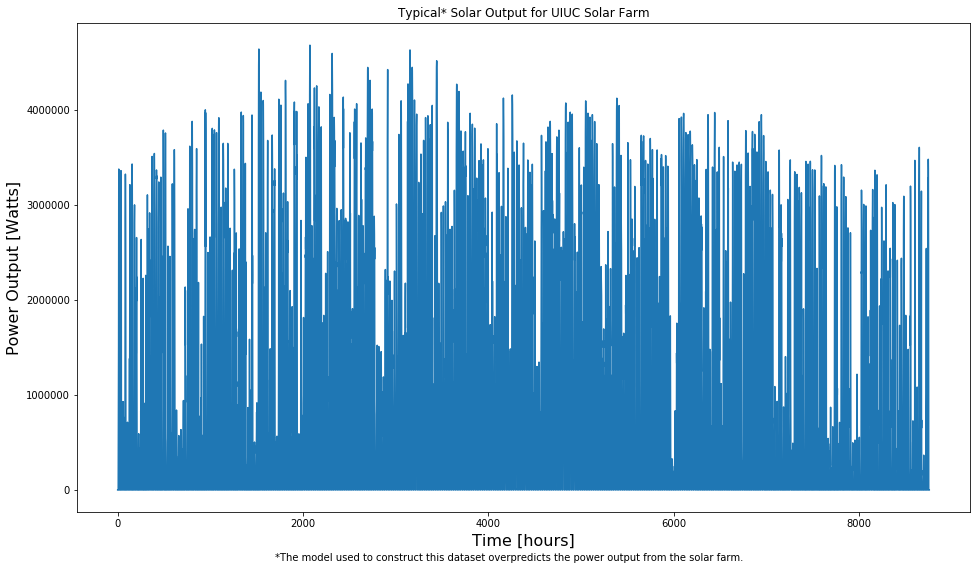

In [45]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(typical['time'],typical['power_norm'])
plt.xlabel('Time [hours]', fontsize=16)
plt.ylabel('Power Output [Watts]',fontsize=16)
plt.title('Typical* Solar Output for UIUC Solar Farm')
txt = '*The model used to construct this dataset overpredicts the power output from the solar farm.'
fig.text(.5, .05, txt, ha='center')

In [35]:
max(typical['power_norm'])

4680000.0

In [36]:
min(typical['power_norm'])

0.0